<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-packages" data-toc-modified-id="Importing-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing packages</a></span></li><li><span><a href="#Loading-dataset" data-toc-modified-id="Loading-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading dataset</a></span></li><li><span><a href="#Reading-dataset" data-toc-modified-id="Reading-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading dataset</a></span></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring the data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Create-a-subsetted-text-field-for-easier-printing" data-toc-modified-id="Create-a-subsetted-text-field-for-easier-printing-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Create a subsetted text field for easier printing</a></span></li><li><span><a href="#Converting-fields-to-appropriate-datatypes" data-toc-modified-id="Converting-fields-to-appropriate-datatypes-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Converting fields to appropriate datatypes</a></span></li></ul></li><li><span><a href="#Missing-values-in-dataset" data-toc-modified-id="Missing-values-in-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Missing values in dataset</a></span><ul class="toc-item"><li><span><a href="#Check-data-where-text-is-missing" data-toc-modified-id="Check-data-where-text-is-missing-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Check data where text is missing</a></span></li></ul></li><li><span><a href="#Length-of-text-fields" data-toc-modified-id="Length-of-text-fields-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Length of text fields</a></span></li><li><span><a href="#Converting-dataset-structure-for-training-DistilBERT-model" data-toc-modified-id="Converting-dataset-structure-for-training-DistilBERT-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Converting dataset structure for training DistilBERT model</a></span></li><li><span><a href="#Create-multilabel-dataset" data-toc-modified-id="Create-multilabel-dataset-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Create multilabel dataset</a></span></li><li><span><a href="#Create-data-loader" data-toc-modified-id="Create-data-loader-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Create data loader</a></span></li><li><span><a href="#Define-DistilBERT-class-for-classification" data-toc-modified-id="Define-DistilBERT-class-for-classification-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Define DistilBERT class for classification</a></span></li><li><span><a href="#Define-loss-function-and-optimizer" data-toc-modified-id="Define-loss-function-and-optimizer-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Define loss function and optimizer</a></span></li><li><span><a href="#Model-Validation" data-toc-modified-id="Model-Validation-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Model Validation</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Training-and-Validation-Curves" data-toc-modified-id="Training-and-Validation-Curves-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Training and Validation Curves</a></span><ul class="toc-item"><li><span><a href="#Model-Evaluation-metrics" data-toc-modified-id="Model-Evaluation-metrics-4.10.1"><span class="toc-item-num">4.10.1&nbsp;&nbsp;</span>Model Evaluation metrics</a></span></li></ul></li><li><span><a href="#Model-performance-at-initial-epochs" data-toc-modified-id="Model-performance-at-initial-epochs-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Model performance at initial epochs</a></span></li></ul></li></ul></div>

# Mutation Consequence Detection - DistilBERT MultiLabel model
 - Finetuning distilbert multi-label model
 - Deep Learning based NLP systems have provent to outperform traditional ML algorithms, especially Google's new BERT architecture
 - DistilBERT is knowledge distilled model that achieves BERT level performance at less compute and memory cost
 - Our hypothesis is that this will perform well on our big dataset, and enable insights for further approach


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing packages

In [2]:
! pip install transformers==3.0.2

     |████████████████████████████████| 778kB 18.4MB/s eta 0:00:01
     |████████████████████████████████| 890kB 47.6MB/s 
     |████████████████████████████████| 1.2MB 50.8MB/s 
     |████████████████████████████████| 3.0MB 52.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=4cadf0b61b969f5ed278bd104a9e86f3d17c7cc6ec9f41c5e3d46c1f3529ea35
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
# Importing stock ml libraries


import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import os 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

import spacy

# Observe how I imported Pipeline from IMBLEARN and not SKLEARN


# Show full text in pandas dataframe
pd.set_option('display.max_colwidth', -1)

# Colormap
cm = sns.light_palette("green", as_cmap=True)

import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertModel
import logging
logging.basicConfig(level=logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [4]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [5]:
device

'cuda'

## Loading dataset

Change current working directory to this notebook's location

In [6]:
os.getcwd()

'/content'

In [7]:
code_path = '/content/drive/MyDrive/GitHub IU/nlp_mutation_effect_pred/advait/'

In [8]:
os.chdir(code_path)
os.getcwd()

'/content/drive/MyDrive/GitHub IU/nlp_mutation_effect_pred/advait'

In [9]:
!pip install contractions

     |████████████████████████████████| 245kB 39.7MB/s 
     |████████████████████████████████| 327kB 59.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp36-cp36m-linux_x86_64.whl size=84338 sha256=39422291b0fb33a3c152a8cb943a9db0d3417763747f9d1b43bd5c68098f917c
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [10]:
import helper_functions_nlp as hf

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Reading dataset

In [11]:
data_path = '../data/'
os.listdir(data_path)

['Data_v2.xlsx',
 'Functional_Consequences_v1.xlsx',
 'fuct_consequence_search_terms.txt',
 'Data_v3.xlsx',
 'Data_v3_scale_2.xlsx']

In [ ]:
# data = pd.read_excel(data_path + 'Functional_Consequences_v1.xlsx', sheet_name='data-1611195358207')


In [12]:
data = pd.read_excel(data_path + 'Data_v3.xlsx', sheet_name='Sheet1', index_col=0)


In [13]:
data.columns

Index(['phenotype_mim_num', 'gene_mim_num', 'Entrez Gene ID (NCBI)',
       'Approved Gene Symbol (HGNC)', 'mutation_consequence', 'text',
       'extracted_text'],
      dtype='object')

Rename columns for convenience

In [14]:
data = data.rename(columns={'Entrez Gene ID (NCBI)':'gene_id', 'Approved Gene Symbol (HGNC)':'gene_symbol'})

In [15]:
data.columns

Index(['phenotype_mim_num', 'gene_mim_num', 'gene_id', 'gene_symbol',
       'mutation_consequence', 'text', 'extracted_text'],
      dtype='object')

## Exploring the data

#### Create a subsetted text field for easier printing

In [16]:
data['text_head'] = data['text'].str[:60]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   phenotype_mim_num     482 non-null    int64 
 1   gene_mim_num          482 non-null    int64 
 2   gene_id               482 non-null    int64 
 3   gene_symbol           482 non-null    object
 4   mutation_consequence  482 non-null    object
 5   text                  482 non-null    object
 6   extracted_text        482 non-null    object
 7   text_head             482 non-null    object
dtypes: int64(3), object(5)
memory usage: 33.9+ KB


#### Converting fields to appropriate datatypes
- phenotype_mim_num, gene_id and gene_mim_num are categorical fields

In [18]:
data.phenotype_mim_num = data.phenotype_mim_num.astype('object')
data.gene_mim_num = data.gene_mim_num.astype('object')
data.gene_id = data.gene_id.astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   phenotype_mim_num     482 non-null    object
 1   gene_mim_num          482 non-null    object
 2   gene_id               482 non-null    object
 3   gene_symbol           482 non-null    object
 4   mutation_consequence  482 non-null    object
 5   text                  482 non-null    object
 6   extracted_text        482 non-null    object
 7   text_head             482 non-null    object
dtypes: object(8)
memory usage: 33.9+ KB


There seem to be missing or duplicate values - most importantly in text field

In [19]:
data.describe(include='O')

,phenotype_mim_num,gene_mim_num,gene_id,gene_symbol,mutation_consequence,text,extracted_text,text_head
count,482,482,482,482,482,482,482,482
unique,420,385,385,385,5,474,469,464
top,601626,604581,10939,TP53,DN,"{21:Johnson et al. (2003)} identified a 940A-C transversion in exon 2 of the HOXD13 gene, resulting in an ile314-to-leu (I314L) mutation, in 18 members from 2 families (10 from one, 8 from the other) who demonstrated phenotypic overlap of brachydactyly types D (BDD; {113200}) and E (BDE1; {113300}). Apart from moderate generalized brachydactyly, {21:Johnson et al. (2003)} found 4 phenotypic patterns associated with the mutation: severe middle finger metacarpal brachydactyly, severe little finger distal phalanx hypoplasia/aplasia, a combination of those 2, and ring finger lateral phalangeal duplication accompanied by three-fourths syndactyly and/or additional features. In 5 of 17 individuals, the phenotype differed between the hands. Most affected individuals had little finger distal phalangeal hypoplasia/aplasia, either alone or in association with other abnormalities, but there were 3 hands with middle finger metacarpal brachydactyly but relatively normal fifth digit distal phalanges. Of 20 feet from molecularly confirmed cases, 8 showed mild clinical abnormalities.\n\n{10:Caronia et al. (2003)} identified the I314L mutation in a 6-generation Caucasian English family with a phenotype similar to that reported by {21:Johnson et al. (2003)}, which {10:Caronia et al. (2003)} described as a combination of brachydactyly and central polydactyly. Microsatellite genotyping showed that the affected individuals from the family reported by {10:Caronia et al. (2003)} and the 2 families reported by {21:Johnson et al. (2003)} shared the same haplotype across the HOXD cluster region, suggesting that the mutation arose in a common ancestor. {10:Caronia et al. (2003)} compared the I314L mutant protein both in vitro and in vivo with the wildtype protein and with an artificial HOXD13 mutant that was completely unable to bind DNA. They found that the mutation caused neither a dominant-negative effect nor a gain of function, but instead impaired DNA binding at some sites bound by wildtype HOXD13. Using retrovirus-mediated misexpression in developing chick limbs, they showed that wildtype HOXD13 could upregulate chick EphA7 ({602190}) in the autopod, but that the I314L mutant form could not. In the zeugopod, however, the mutant form produced striking changes in tibial morphology and ectopic cartilages that were never produced by the artificial HOXD13 mutant, consistent with a selective rather than generalized loss of function. The authors concluded that a mutant HOX protein that recognized only a subset of sites recognized by the wildtype protein caused a novel human malformation, pointing to a hitherto undescribed mechanism by which missense mutations in transcription factors can generate unexpected phenotypes.\n\n{36:Salsi and Zappavigna (2006)} found that HOXD13 with the I314L mutation failed to bind and activate the EPHA7 promoter.\n{21:Johnson et al. (2003)} sequenced the HOXD13 gene in a family previously classified as having brachydactyly type E (BDE1; {113300}), and identified a heterozygous 923C-G transversion in exon 2 of the gene, resulting in a ser308-to-cys (S308C) mutation located at the forty-first position of the homeodomain. The mutation segregated in concordance with the phenotype in 9 affected individuals and in 1 unaffected individual at 50% prior risk. The characteristic features were shortening of 1 or more of the metacarpals or metatarsals or of both, often occurring asymmetrically, together with either shortening or elongation of specific distal phalanges (notably the first and fifth) and carpal bone fusion. The hand phenotype showed wide intrafamilial variation of the features, which overlapped those described in brachydactyly types D (BDD; {113200}) and E.","this effect was prevented by mutating the atp-binding site

### Missing values in dataset

In [20]:
pd.concat([data.isnull().sum().sort_values(ascending=False), data.isnull().sum().sort_values(ascending=False)*100/len(data)], axis=1).rename(columns={0:'missing_count', 1:'missing_pct'})

,missing_count,missing_pct
text_head,0,0.0
extracted_text,0,0.0
text,0,0.0
mutation_consequence,0,0.0
gene_symbol,0,0.0
gene_id,0,0.0
gene_mim_num,0,0.0
phenotype_mim_num,0,0.0


#### Check data where text is missing
- Most of them belong to the 'none category'
- Remove these data points since they are not useful for building the model

In [21]:
data[data.text.isnull()]

,phenotype_mim_num,gene_mim_num,gene_id,gene_symbol,mutation_consequence,text,extracted_text,text_head


In [22]:
data[data.extracted_text.isnull()]

,phenotype_mim_num,gene_mim_num,gene_id,gene_symbol,mutation_consequence,text,extracted_text,text_head


In [ ]:
data = data[~data.text.isnull()]

### Length of text fields

In [23]:
data, cols = hf.linguistic_feature_gen(data, col = "extracted_text")

Started linguistic feature generation on column: extracted_text
Finished linguistic feature generation, created following new columns:  ['avg_word_length', 'capitals', 'words_vs_unique', 'num_punctuation', 'num_unique_words', 'num_words', 'num_exclamation_marks', 'total_length', 'caps_vs_length', 'char_count', 'num_question_marks', 'num_symbols', 'upper_case_word_count']


In [24]:
data.columns

Index(['phenotype_mim_num', 'gene_mim_num', 'gene_id', 'gene_symbol',
       'mutation_consequence', 'text', 'extracted_text', 'text_head',
       'total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
       'num_question_marks', 'num_punctuation', 'num_symbols', 'num_words',
       'num_unique_words', 'words_vs_unique', 'char_count', 'avg_word_length',
       'upper_case_word_count'],
      dtype='object')

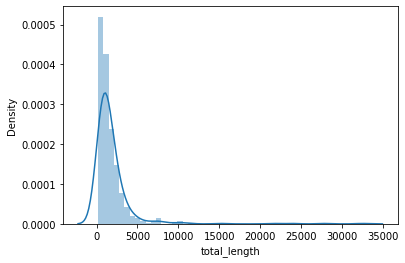

In [25]:
sns.distplot(data.total_length)

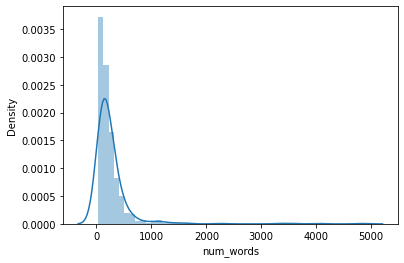

In [26]:
sns.distplot(data.num_words)

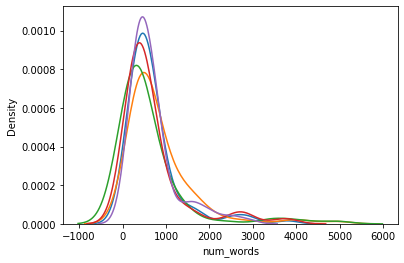

In [ ]:
for label in data.mutation_consequence.unique():
  sns.distplot(data[data.mutation_consequence == label].num_words, hist=False)

In [ ]:
data.head(1)

,phenotype_mim_num,gene_mim_num,gene_id,gene_symbol,mutation_consequence,text,text_head,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,char_count,avg_word_length,upper_case_word_count
0,300983,300838,9758,FRMPD4,HI,"In 5 affected males from a family (P58) with X-linked mental retardation-104 (MRX104; {300983}), {2:Hu et al. (2016)} identified a hemizygous 1-bp deletion ({VAR chrX.12,734,425del, GRCh37}) in the FRMPD4 gene, resulting in a frameshift and premature termination (Cys618ValfsTer8). The mutation was found by X-chromosome exome sequencing and segregated with the disorder in the family. Functional studies of the variant were not performed.\n\n{5:Piard et al. (2018)} noted that the Cys618ValfsTer8 mutation predicts a truncated protein that lacks the C-terminal HOMER1 ({604798}) binding domain and the PDZ binding domain. In vitro functional expression studies in HEK293 cells showed the mutation protein disrupted FRMPD4 binding with PSD95 ({602887}) and HOMER1. Transection of the mutation into rat hippocampal cells resulted in a failure to increase spine density and caused abnormal spine morphology, consistent with a loss of function. Alternatively, the mutation could result in nonsense-mediated mRNA decay and a loss of function, but patient neural tissue was not available.\nIn a 17-year-old male (L87) with X-linked mental retardation-104 (MRX104; {300983}), {2:Hu et al. (2016)} identified a de novo hemizygous T-C transition ({VAR chrX.12,734,235T-C, GRCh37}) in the FRMPD4 gene, resulting in a cys553-to-arg (C553R) substitution. The mutation was found by X-chromosome exome sequencing. Functional studies of the variant were not performed.\n\n{5:Piard et al. (2018)} noted that the C553R mutation occurs at a highly conserved residue near the FERM domain, and may result in a loss of function. The mutation was not found in the dbSNP, 1000 Genomes Project, or Exome Variant Server databases.\nIn 2 brothers (patients 6 and 7, family 2) with X-linked mental retardation-104 (MRX104; {300983}), {5:Piard et al. (2018)} identified a hemizygous 66-kb deletion in the FRMPD4 gene, resulting in the deletion of exon 2. The mutation, which was found by X-chromosome exome sequencing and confirmed by Sanger sequencing, was inherited from the unaffected mother. The mutation was not found in the dbSNP, 1000 Genomes Project, or Exome Variant Server databases. The mutation was predicted to cause an in-frame deletion of 40 amino acids that includes the entire WW domain at the N terminus. Functional studies of the variant and studies of patient cells were not performed, but the mutation was predicted to result in a loss of function.\nIn 2 maternal half-brothers (patients 8 and 9, family 3) with X-linked mental retardation-104 (MRX104; {300983}), {5:Piard et al. (2018)} identified a hemizygous c.856C-T transition in the FRMPD4 gene, resulting in an arg286-to-ter (R286X) substitution. The mutation, which was found by X-chromosome exome sequencing and confirmed by Sanger sequencing, segregated with the disorder in the family. The unaffected mother was a carrier, as was a mildly affected sister. The mutation was not found in the dbSNP, 1000 Genomes Project, or Exome Variant Server databases. Functional studies of the variant and studies of patient cells were not performed, but the mutation was predicted to disrupt the FERM domain or to result in nonsense-mediated mRNA decay, consistent with a loss of function.",In 5 affected males from a family (P58) with X-linked mental,3227,168,0.052061,0,0,176,0,486,185,0.380658,2744,5.646091,26


### Converting dataset structure for training DistilBERT model

In [27]:
data = pd.concat([data, pd.get_dummies(data.mutation_consequence)],axis=1)

In [28]:
data.columns

Index(['phenotype_mim_num', 'gene_mim_num', 'gene_id', 'gene_symbol',
       'mutation_consequence', 'text', 'extracted_text', 'text_head',
       'total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
       'num_question_marks', 'num_punctuation', 'num_symbols', 'num_words',
       'num_unique_words', 'words_vs_unique', 'char_count', 'avg_word_length',
       'upper_case_word_count', 'DN', 'GOF', 'HI', 'LOF', 'none'],
      dtype='object')

In [29]:
data.mutation_consequence.unique()

array(['HI', 'DN', 'none', 'GOF', 'LOF'], dtype=object)

In [30]:
categories = ['HI', 'DN', 'none', 'GOF', 'LOF']

In [31]:
new_df = pd.DataFrame()
new_df['text'] = data['extracted_text']
new_df['labels'] = data[categories].values.astype('int').tolist()

In [32]:
new_df.head(1)

,text,labels
0,"in 5 affected males from a family (p58) with x-linked mental retardation-104 (mrx104; {300983}), {2:hu et (2016)} identified a hemizygous 1-bp deletion ({var chrx.12,734,425del, grch37}) in the frmpd4 gene, resulting in a frameshift and premature termination (cys618valfster8). the mutation was found by x-chromosome exome sequencing and segregated with the disorder in the family. in vitro functional expression studies in hek293 cells showed the mutation protein disrupted frmpd4 binding with psd95 ({602887}) and homer1. transection of the mutation into rat hippocampal cells resulted in a failure to increase spine density and caused abnormal spine morphology, consistent with a loss of function. alternatively, the mutation could result in nonsense-mediated mrna decay and a loss of function, but patient neural tissue was not available.\nin a 17-year-old male (l87) with x-linked mental retardation-104 (mrx104; {300983}), {2:hu et (2016)} identified a de novo hemizygous t-c transition ({var chrx.12,734,235t-c, grch37}) in the frmpd4 gene, resulting in a cys553-to-arg (c553r) substitution. the mutation was found by x-chromosome exome sequencing. functional studies of the variant were not performed. {5:piard et (2018)} noted that the c553r mutation occurs at a highly conserved residue near the ferm domain, and may result in a loss of function. the mutation was not found in the dbsnp, 1000 genomes project, or exome variant server databases.\nin 2 brothers (patients 6 and 7, family 2) with x-linked mental retardation-104 (mrx104; {300983}), {5:piard et (2018)} identified a hemizygous 66-kb deletion in the frmpd4 gene, resulting in the deletion of exon 2. the mutation, which was found by x-chromosome exome sequencing and confirmed by sanger sequencing, was inherited from the unaffected mother. the mutation was not found in the dbsnp, 1000 genomes project, or exome variant server databases. the mutation was predicted to cause an in-frame deletion of 40 amino acids that includes the entire ww domain at the n terminus. functional studies of the variant and studies of patient cells were not performed, but the mutation was predicted to result in a loss of function.\nin 2 maternal half-brothers (patients 8 and 9, family 3) with x-linked mental retardation-104 (mrx104; {300983}), {5:piard et (2018)} identified a hemizygous c.856c-t transition in the frmpd4 gene, resulting in an arg286-to-ter (r286x) substitution. the mutation, which was found by x-chromosome exome sequencing and confirmed by sanger sequencing, segregated with the disorder in the family. functional studies of the variant and studies of patient cells were not performed, but the mutation was predicted to disrupt the ferm domain or to result in nonsense-mediated mrna decay, consistent with a loss of function.","[1, 0, 0, 0, 0]"


### Create multilabel dataset

In [33]:
MAX_LEN = 512
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
LEARNING_RATE = 3e-05
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)

In [34]:
class MultiLabelDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.text
        self.targets = self.data.labels
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [35]:
train_size = 0.85
train_data=new_df.sample(frac=train_size,random_state=200)
test_data=new_df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = MultiLabelDataset(train_data, tokenizer, MAX_LEN)
testing_set = MultiLabelDataset(test_data, tokenizer, MAX_LEN)

FULL Dataset: (482, 2)
TRAIN Dataset: (410, 2)
TEST Dataset: (72, 2)


### Create data loader

In [36]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

### Define DistilBERT class for classification

In [37]:
class DistilBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistilBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier = torch.nn.Linear(768, 5)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

model = DistilBERTClass()
# model.to(device)

### Define loss function and optimizer

In [38]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [39]:

optimizer = torch.optim.AdamW(params = model.parameters(), lr=LEARNING_RATE)

In [40]:
model.to(device)

DistilBERTClass(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_featu

In [41]:
#model = torch.load('/content/drive/My Drive/distilbert_demo_emotions_11_1_epoch4.bin')


### Model Validation 


*   attention: outputs and targets are tensor on device that you pointed out
*   when you want you change them into numpy arrays, you first need to pull them to cpu and detach, then you can call numpy() to change them to numpy array



In [42]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [43]:
def validation(testing_loader):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [44]:
outputs, targets = validation(testing_loader)

final_outputs = np.array(outputs) >=0.5

18it [00:01, 11.55it/s]


In [45]:
class InferenceDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len, padding=True):
        self.tokenizer = tokenizer
        self.text = texts
        self.max_len = max_len
        self.padding = padding

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = self.text[index]

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=self.padding,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long)
        }

In [46]:
def predict_batch(predictor, test_data, tokenizer, MAX_LEN=64, batch_size=128, device='cpu', padding=True, quantize = True):
  """Function to run batch inference on input text"""

  if quantize:
    predictor = torch.quantization.quantize_dynamic(predictor, {torch.nn.Linear}, dtype=torch.qint8)

  data_set = MultiLabelDataset(test_data, tokenizer, MAX_LEN)

  data_params = {'batch_size': batch_size,
                  'shuffle': False,
                  'num_workers': 0
                  }
  data_loader = DataLoader(data_set, **data_params)

  
  predictor.eval()
  pred_dataloader=[]
  

  total_loss = 0.0
  data_len = 0
  with torch.no_grad():
      for _, data in tqdm(enumerate(data_loader, 0)):
          ids = data['ids'].to(device, dtype = torch.long)
          mask = data['mask'].to(device, dtype = torch.long)
          token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
          outputs = predictor(ids, mask, token_type_ids)
          targets = data['targets'].to(device, dtype = torch.float)
          loss = loss_fn(outputs, targets)
          total_loss += loss.item()
          data_len += 1

          pred_dataloader.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
      print(f'Validation Loss:  {total_loss/data_len}')
  return pred_dataloader, total_loss/data_len

In [47]:
len(test_data.text)

72

In [48]:
pred_y, total_loss = predict_batch(model, test_data, tokenizer, MAX_LEN=MAX_LEN, batch_size=128, device=device, padding = True, quantize = False)

1it [00:01,  1.69s/it]

Validation Loss:  0.6851080656051636


### Model Training

In [49]:

train_loss = []
val_loss = []

def train(epoch):
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%5==0:
            print(f'Epoch: {epoch}, Train Loss:  {loss.item()}')
            pred_y, val_loss_int = predict_batch(model, test_data,
                                               tokenizer, MAX_LEN=MAX_LEN, batch_size=128, 
                                               device=device, padding = True, quantize = False)
            train_loss.append(loss.item())
            val_loss.append(val_loss_int)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [50]:
EPOCHS = 25
        
for epoch in range(EPOCHS):
    print("Epoch : ",epoch)
    train(epoch)
    output_model_file = 'models/distilbert_v2_epoch{}.bin'.format(epoch)
    torch.save(model, output_model_file)

0it [00:00, ?it/s]

Epoch :  0



0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.6805804371833801



1it [00:01,  1.66s/it]


Validation Loss:  0.6851080656051636


5it [00:03,  1.19it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.5785447359085083



1it [00:01,  1.65s/it]


Validation Loss:  0.5764822959899902


10it [00:07,  1.66it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.5489059686660767



1it [00:01,  1.67s/it]


Validation Loss:  0.5236527323722839


15it [00:11,  1.75it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.49853530526161194



1it [00:01,  1.68s/it]


Validation Loss:  0.50300532579422


20it [00:15,  1.76it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.4909801185131073



1it [00:01,  1.68s/it]


Validation Loss:  0.5026023387908936


25it [00:18,  1.79it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.4755745530128479



1it [00:01,  1.68s/it]


Validation Loss:  0.5029579997062683


30it [00:22,  1.76it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.5127770304679871



1it [00:01,  1.72s/it]


Validation Loss:  0.4951413571834564


35it [00:26,  1.67it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.4847254753112793



1it [00:01,  1.72s/it]


Validation Loss:  0.4853559732437134


40it [00:30,  1.75it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.4802972376346588



1it [00:01,  1.76s/it]


Validation Loss:  0.47706127166748047


45it [00:34,  1.76it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.4594365060329437



1it [00:01,  1.76s/it]


Validation Loss:  0.4872015416622162


50it [00:38,  1.74it/s]
0it [00:00, ?it/s]

Epoch: 0, Train Loss:  0.47414276003837585



1it [00:01,  1.79s/it]


Validation Loss:  0.4696985185146332


52it [00:40,  1.28it/s]
0it [00:00, ?it/s]

Epoch :  1



0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.4738626480102539



1it [00:01,  1.78s/it]


Validation Loss:  0.4669324457645416


5it [00:04,  1.11it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.4904542565345764



1it [00:01,  1.77s/it]


Validation Loss:  0.4652555286884308


10it [00:08,  1.57it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.45699357986450195



1it [00:01,  1.81s/it]


Validation Loss:  0.4504881501197815


15it [00:12,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.4539068639278412



1it [00:01,  1.86s/it]


Validation Loss:  0.448616087436676


20it [00:16,  1.67it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.3959004878997803



1it [00:01,  1.82s/it]


Validation Loss:  0.44744622707366943


25it [00:20,  1.66it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.4699614942073822



1it [00:01,  1.82s/it]


Validation Loss:  0.434150755405426


30it [00:24,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.399512380361557



1it [00:01,  1.84s/it]


Validation Loss:  0.417488157749176


35it [00:28,  1.66it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.40377360582351685



1it [00:01,  1.87s/it]


Validation Loss:  0.4232819676399231


40it [00:32,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.4140934944152832



1it [00:01,  1.87s/it]


Validation Loss:  0.3923327326774597


45it [00:36,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.3872116506099701



1it [00:01,  1.89s/it]


Validation Loss:  0.3764108121395111


50it [00:40,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 1, Train Loss:  0.3540971279144287



1it [00:01,  1.91s/it]


Validation Loss:  0.3448500335216522


52it [00:43,  1.20it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  2
Epoch: 2, Train Loss:  0.316150963306427



1it [00:01,  1.92s/it]


Validation Loss:  0.34249964356422424


5it [00:04,  1.07it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.342821329832077



1it [00:01,  1.94s/it]


Validation Loss:  0.3337206542491913


10it [00:08,  1.41it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.41668596863746643



1it [00:01,  1.96s/it]


Validation Loss:  0.3125123083591461


15it [00:12,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.33515220880508423



1it [00:01,  1.91s/it]


Validation Loss:  0.30988508462905884


20it [00:17,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.3640879690647125



1it [00:01,  1.89s/it]


Validation Loss:  0.3090921640396118


25it [00:21,  1.57it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.24746465682983398



1it [00:01,  1.87s/it]


Validation Loss:  0.2930991053581238


30it [00:25,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.23037214577198029



1it [00:01,  1.86s/it]


Validation Loss:  0.2849085330963135


35it [00:29,  1.68it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.2963660657405853



1it [00:01,  1.85s/it]


Validation Loss:  0.2730122208595276


40it [00:33,  1.54it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.18727153539657593



1it [00:01,  1.85s/it]


Validation Loss:  0.2622711658477783


45it [00:37,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.22760450839996338



1it [00:01,  1.84s/it]


Validation Loss:  0.2683223485946655


50it [00:41,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 2, Train Loss:  0.2421238273382187



1it [00:01,  1.84s/it]


Validation Loss:  0.2668006420135498


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  3
Epoch: 3, Train Loss:  0.25195106863975525



1it [00:01,  1.85s/it]


Validation Loss:  0.2643442749977112


5it [00:04,  1.13it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.225968599319458



1it [00:01,  1.83s/it]


Validation Loss:  0.27108314633369446


10it [00:08,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.14105603098869324



1it [00:01,  1.84s/it]


Validation Loss:  0.23543375730514526


15it [00:12,  1.55it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.11354142427444458



1it [00:01,  1.83s/it]


Validation Loss:  0.23146121203899384


20it [00:16,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.2588367462158203



1it [00:01,  1.84s/it]


Validation Loss:  0.24932259321212769


25it [00:20,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.09726927429437637



1it [00:01,  1.86s/it]


Validation Loss:  0.23920074105262756


30it [00:24,  1.67it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.16499514877796173



1it [00:01,  1.85s/it]


Validation Loss:  0.23349285125732422


35it [00:28,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.12645605206489563



1it [00:01,  1.87s/it]


Validation Loss:  0.244648277759552


40it [00:32,  1.66it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.23160283267498016



1it [00:01,  1.87s/it]


Validation Loss:  0.2629183828830719


45it [00:37,  1.51it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.1833985596895218



1it [00:01,  1.87s/it]


Validation Loss:  0.24925069510936737


50it [00:41,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 3, Train Loss:  0.16214817762374878



1it [00:01,  1.89s/it]


Validation Loss:  0.2415262758731842


52it [00:43,  1.19it/s]
0it [00:00, ?it/s]

Epoch :  4



0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.18818849325180054



1it [00:01,  1.86s/it]


Validation Loss:  0.24534887075424194


5it [00:04,  1.11it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.1536169797182083



1it [00:01,  1.85s/it]


Validation Loss:  0.2467552274465561


10it [00:08,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.19989652931690216



1it [00:01,  1.88s/it]


Validation Loss:  0.24537672102451324


15it [00:12,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.07453596591949463



1it [00:01,  1.89s/it]


Validation Loss:  0.2588443160057068


20it [00:16,  1.58it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.08087822049856186



1it [00:01,  1.89s/it]


Validation Loss:  0.25917452573776245


25it [00:20,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.19564667344093323



1it [00:01,  1.90s/it]


Validation Loss:  0.2523801624774933


30it [00:25,  1.54it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.08501819521188736



1it [00:01,  1.86s/it]


Validation Loss:  0.27334916591644287


35it [00:29,  1.55it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.10308241099119186



1it [00:01,  1.89s/it]


Validation Loss:  0.2718832194805145


40it [00:33,  1.59it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.27009347081184387



1it [00:01,  1.86s/it]


Validation Loss:  0.24878349900245667


45it [00:37,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.35010647773742676



1it [00:01,  1.87s/it]


Validation Loss:  0.25172218680381775


50it [00:41,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 4, Train Loss:  0.15158024430274963



1it [00:01,  1.87s/it]


Validation Loss:  0.28689974546432495


52it [00:44,  1.18it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  5
Epoch: 5, Train Loss:  0.11907356232404709



1it [00:01,  1.87s/it]


Validation Loss:  0.24675989151000977


5it [00:04,  1.11it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.16144771873950958



1it [00:01,  1.87s/it]


Validation Loss:  0.24712958931922913


10it [00:08,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.1897992491722107



1it [00:01,  1.87s/it]


Validation Loss:  0.2507284879684448


15it [00:12,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.1109282523393631



1it [00:01,  1.85s/it]


Validation Loss:  0.3017508089542389


20it [00:16,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.24779872596263885



1it [00:01,  1.87s/it]


Validation Loss:  0.330424964427948


25it [00:20,  1.58it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.13274523615837097



1it [00:01,  1.88s/it]


Validation Loss:  0.2530754506587982


30it [00:24,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.19582371413707733



1it [00:01,  1.87s/it]


Validation Loss:  0.2653461694717407


35it [00:29,  1.57it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.255429744720459



1it [00:01,  1.88s/it]


Validation Loss:  0.2698989510536194


40it [00:33,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.29393789172172546



1it [00:01,  1.87s/it]


Validation Loss:  0.24806851148605347


45it [00:37,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.06370125710964203



1it [00:01,  1.87s/it]


Validation Loss:  0.2421237826347351


50it [00:41,  1.67it/s]
0it [00:00, ?it/s]

Epoch: 5, Train Loss:  0.21863213181495667



1it [00:01,  1.87s/it]


Validation Loss:  0.2684895098209381


52it [00:43,  1.18it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  6
Epoch: 6, Train Loss:  0.14854779839515686



1it [00:01,  1.91s/it]


Validation Loss:  0.26625755429267883


5it [00:04,  1.12it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.0578368678689003



1it [00:01,  1.89s/it]


Validation Loss:  0.2512878477573395


10it [00:08,  1.49it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.13048693537712097



1it [00:01,  1.89s/it]


Validation Loss:  0.24815963208675385


15it [00:12,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.0949879065155983



1it [00:01,  1.88s/it]


Validation Loss:  0.2459881454706192


20it [00:16,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.13355018198490143



1it [00:01,  1.88s/it]


Validation Loss:  0.26887246966362


25it [00:21,  1.50it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.15800230205059052



1it [00:01,  1.88s/it]


Validation Loss:  0.27200525999069214


30it [00:25,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.04397011175751686



1it [00:01,  1.88s/it]


Validation Loss:  0.28441905975341797


35it [00:29,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.04189477860927582



1it [00:01,  1.89s/it]


Validation Loss:  0.2759077847003937


40it [00:33,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.03655688092112541



1it [00:01,  1.88s/it]


Validation Loss:  0.27616968750953674


45it [00:37,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.1528627872467041



1it [00:01,  1.87s/it]


Validation Loss:  0.27770012617111206


50it [00:41,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 6, Train Loss:  0.047729380428791046



1it [00:01,  1.89s/it]


Validation Loss:  0.26114895939826965


52it [00:44,  1.18it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  7
Epoch: 7, Train Loss:  0.0540265329182148



1it [00:01,  1.86s/it]


Validation Loss:  0.2588992714881897


5it [00:04,  1.11it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.04870647192001343



1it [00:01,  1.87s/it]


Validation Loss:  0.26334771513938904


10it [00:08,  1.51it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.06537455320358276



1it [00:01,  1.88s/it]


Validation Loss:  0.2741398215293884


15it [00:12,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.05770465359091759



1it [00:01,  1.87s/it]


Validation Loss:  0.29376259446144104


20it [00:16,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.08387962728738785



1it [00:01,  1.88s/it]


Validation Loss:  0.2960425913333893


25it [00:20,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.09193878620862961



1it [00:01,  1.88s/it]


Validation Loss:  0.2952134311199188


30it [00:24,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.03865855932235718



1it [00:01,  1.88s/it]


Validation Loss:  0.29185324907302856


35it [00:29,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.03502156212925911



1it [00:01,  1.89s/it]


Validation Loss:  0.28662723302841187


40it [00:33,  1.58it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.0905626118183136



1it [00:01,  1.87s/it]


Validation Loss:  0.28490355610847473


45it [00:37,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.040335677564144135



1it [00:01,  1.89s/it]


Validation Loss:  0.29313305020332336


50it [00:41,  1.55it/s]
0it [00:00, ?it/s]

Epoch: 7, Train Loss:  0.07172399014234543



1it [00:01,  1.89s/it]


Validation Loss:  0.3125150501728058


52it [00:44,  1.18it/s]
0it [00:00, ?it/s]

Epoch :  8



0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.040165845304727554



1it [00:01,  1.88s/it]


Validation Loss:  0.31622591614723206


5it [00:04,  1.10it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.02642449550330639



1it [00:01,  1.87s/it]


Validation Loss:  0.3162117004394531


10it [00:08,  1.47it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.07612668722867966



1it [00:01,  1.92s/it]


Validation Loss:  0.32188963890075684


15it [00:12,  1.59it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.13316230475902557



1it [00:01,  1.88s/it]


Validation Loss:  0.3241536021232605


20it [00:16,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.11871278285980225



1it [00:01,  1.87s/it]


Validation Loss:  0.33008161187171936


25it [00:20,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.16310778260231018



1it [00:01,  1.88s/it]


Validation Loss:  0.3267320394515991


30it [00:25,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.17198000848293304



1it [00:01,  1.88s/it]


Validation Loss:  0.32559582591056824


35it [00:29,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.1671733409166336



1it [00:01,  1.88s/it]


Validation Loss:  0.32628145813941956


40it [00:33,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.06667598336935043



1it [00:01,  1.88s/it]


Validation Loss:  0.33597332239151


45it [00:37,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.035828281193971634



1it [00:01,  1.89s/it]


Validation Loss:  0.33103662729263306


50it [00:41,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 8, Train Loss:  0.02210344187915325



1it [00:01,  1.88s/it]


Validation Loss:  0.3302150368690491


52it [00:44,  1.18it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  9
Epoch: 9, Train Loss:  0.11223413050174713



1it [00:01,  1.88s/it]


Validation Loss:  0.3293706476688385


5it [00:04,  1.10it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.03632715716958046



1it [00:01,  1.89s/it]


Validation Loss:  0.3327191174030304


10it [00:08,  1.44it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.04806169867515564



1it [00:01,  1.94s/it]


Validation Loss:  0.33611825108528137


15it [00:12,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.06357230246067047



1it [00:01,  1.93s/it]


Validation Loss:  0.35000911355018616


20it [00:16,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.022973401471972466



1it [00:01,  1.88s/it]


Validation Loss:  0.35866889357566833


25it [00:21,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.024819759652018547



1it [00:01,  1.87s/it]


Validation Loss:  0.3690580725669861


30it [00:25,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.018236175179481506



1it [00:01,  1.86s/it]


Validation Loss:  0.37462159991264343


35it [00:29,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.1508701592683792



1it [00:01,  1.87s/it]


Validation Loss:  0.3722120523452759


40it [00:33,  1.66it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.016460075974464417



1it [00:01,  1.89s/it]


Validation Loss:  0.3513524532318115


45it [00:37,  1.66it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.03284471854567528



1it [00:01,  1.88s/it]


Validation Loss:  0.33283334970474243


50it [00:41,  1.57it/s]
0it [00:00, ?it/s]

Epoch: 9, Train Loss:  0.13599316775798798



1it [00:01,  1.89s/it]


Validation Loss:  0.3388650715351105


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  10
Epoch: 10, Train Loss:  0.13244931399822235



1it [00:01,  1.90s/it]


Validation Loss:  0.33997586369514465


5it [00:04,  1.10it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.01743451878428459



1it [00:01,  1.87s/it]


Validation Loss:  0.34376123547554016


10it [00:08,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.18384414911270142



1it [00:01,  1.91s/it]


Validation Loss:  0.35222288966178894


15it [00:12,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.022827161476016045



1it [00:01,  1.87s/it]


Validation Loss:  0.35779014229774475


20it [00:16,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.04466831311583519



1it [00:01,  1.89s/it]


Validation Loss:  0.39065808057785034


25it [00:20,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.018146207556128502



1it [00:01,  1.88s/it]


Validation Loss:  0.3846632242202759


30it [00:24,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.014617020264267921



1it [00:01,  1.87s/it]


Validation Loss:  0.382193922996521


35it [00:29,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.018891114741563797



1it [00:01,  1.90s/it]


Validation Loss:  0.3693051040172577


40it [00:33,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.019686171784996986



1it [00:01,  1.89s/it]


Validation Loss:  0.3565252125263214


45it [00:37,  1.58it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.028212783858180046



1it [00:01,  1.88s/it]


Validation Loss:  0.353481262922287


50it [00:41,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 10, Train Loss:  0.013162962161004543



1it [00:01,  1.88s/it]


Validation Loss:  0.3523918092250824


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  11
Epoch: 11, Train Loss:  0.12535035610198975



1it [00:01,  1.90s/it]


Validation Loss:  0.3523862361907959


5it [00:04,  1.11it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.01882932521402836



1it [00:01,  1.87s/it]


Validation Loss:  0.3496913015842438


10it [00:08,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.01285769697278738



1it [00:01,  1.89s/it]


Validation Loss:  0.35031840205192566


15it [00:12,  1.57it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.017621878534555435



1it [00:01,  1.87s/it]


Validation Loss:  0.35509997606277466


20it [00:16,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.011097176931798458



1it [00:01,  1.87s/it]


Validation Loss:  0.3594895899295807


25it [00:20,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.01556368451565504



1it [00:01,  1.87s/it]


Validation Loss:  0.36116862297058105


30it [00:25,  1.59it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.013456222601234913



1it [00:01,  1.87s/it]


Validation Loss:  0.36461344361305237


35it [00:29,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.01571977697312832



1it [00:01,  1.88s/it]


Validation Loss:  0.36741453409194946


40it [00:33,  1.58it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.010911664925515652



1it [00:01,  1.89s/it]


Validation Loss:  0.3633376657962799


45it [00:37,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.04381967708468437



1it [00:01,  1.88s/it]


Validation Loss:  0.3541252315044403


50it [00:41,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 11, Train Loss:  0.06273782253265381



1it [00:01,  1.90s/it]


Validation Loss:  0.36008328199386597


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  12
Epoch: 12, Train Loss:  0.04605105146765709



1it [00:01,  1.88s/it]


Validation Loss:  0.36006441712379456


5it [00:04,  1.08it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.009183443151414394



1it [00:01,  1.87s/it]


Validation Loss:  0.3526841700077057


10it [00:08,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.013515240512788296



1it [00:01,  1.88s/it]


Validation Loss:  0.35757532715797424


15it [00:12,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.01356323342770338



1it [00:01,  1.89s/it]


Validation Loss:  0.3602190613746643


20it [00:16,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.020273033529520035



1it [00:01,  1.87s/it]


Validation Loss:  0.3644391596317291


25it [00:20,  1.66it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.012435436248779297



1it [00:01,  1.86s/it]


Validation Loss:  0.36671677231788635


30it [00:24,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.1311386078596115



1it [00:01,  1.88s/it]


Validation Loss:  0.3679373860359192


35it [00:29,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.017200393602252007



1it [00:01,  1.87s/it]


Validation Loss:  0.3563138544559479


40it [00:33,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.014024883508682251



1it [00:01,  1.86s/it]


Validation Loss:  0.3568241596221924


45it [00:37,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.008820307441055775



1it [00:01,  1.88s/it]


Validation Loss:  0.35778528451919556


50it [00:41,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 12, Train Loss:  0.011119596660137177



1it [00:01,  1.89s/it]


Validation Loss:  0.3608987629413605


52it [00:44,  1.18it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  13
Epoch: 13, Train Loss:  0.02164403721690178



1it [00:01,  1.88s/it]


Validation Loss:  0.36220407485961914


5it [00:04,  1.12it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.0106809101998806



1it [00:01,  1.86s/it]


Validation Loss:  0.36621591448783875


10it [00:08,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.011631332337856293



1it [00:01,  1.88s/it]


Validation Loss:  0.36976921558380127


15it [00:12,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.03304486349225044



1it [00:01,  1.89s/it]


Validation Loss:  0.3786446154117584


20it [00:16,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.013541926629841328



1it [00:01,  1.89s/it]


Validation Loss:  0.3877995014190674


25it [00:20,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.11091677099466324



1it [00:01,  1.87s/it]


Validation Loss:  0.39348381757736206


30it [00:24,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.008386494591832161



1it [00:01,  1.88s/it]


Validation Loss:  0.3869185745716095


35it [00:29,  1.67it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.07982756197452545



1it [00:01,  1.89s/it]


Validation Loss:  0.3830430805683136


40it [00:33,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.06346521526575089



1it [00:01,  1.88s/it]


Validation Loss:  0.3769831359386444


45it [00:37,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.06846588850021362



1it [00:01,  1.88s/it]


Validation Loss:  0.378284215927124


50it [00:41,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 13, Train Loss:  0.20705020427703857



1it [00:01,  1.87s/it]


Validation Loss:  0.3791286051273346


52it [00:44,  1.18it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  14
Epoch: 14, Train Loss:  0.01078933384269476



1it [00:01,  1.88s/it]


Validation Loss:  0.37847408652305603


5it [00:04,  1.10it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.013139525428414345



1it [00:01,  1.87s/it]


Validation Loss:  0.3771726191043854


10it [00:08,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.011389002203941345



1it [00:01,  1.90s/it]


Validation Loss:  0.37705329060554504


15it [00:12,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.00982585083693266



1it [00:01,  1.89s/it]


Validation Loss:  0.38131460547447205


20it [00:16,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.008083895780146122



1it [00:01,  1.88s/it]


Validation Loss:  0.3915712535381317


25it [00:20,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.11062321811914444



1it [00:01,  1.90s/it]


Validation Loss:  0.40270695090293884


30it [00:25,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.016225626692175865



1it [00:01,  1.88s/it]


Validation Loss:  0.4288310408592224


35it [00:29,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.009267247281968594



1it [00:01,  1.86s/it]


Validation Loss:  0.4351637065410614


40it [00:33,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.35566434264183044



1it [00:01,  1.88s/it]


Validation Loss:  0.42401254177093506


45it [00:37,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.01360650360584259



1it [00:01,  1.88s/it]


Validation Loss:  0.4032119810581207


50it [00:41,  1.57it/s]
0it [00:00, ?it/s]

Epoch: 14, Train Loss:  0.009020666591823101



1it [00:01,  1.88s/it]


Validation Loss:  0.4173479378223419


52it [00:44,  1.18it/s]
0it [00:00, ?it/s]

Epoch :  15



0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.08297949284315109



1it [00:01,  1.86s/it]


Validation Loss:  0.42263561487197876


5it [00:04,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.06999842822551727



1it [00:01,  1.87s/it]


Validation Loss:  0.41115885972976685


10it [00:08,  1.49it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.007980083115398884



1it [00:01,  1.91s/it]


Validation Loss:  0.4191160500049591


15it [00:12,  1.49it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.1135878935456276



1it [00:01,  1.90s/it]


Validation Loss:  0.42203015089035034


20it [00:16,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.007871768437325954



1it [00:01,  1.88s/it]


Validation Loss:  0.36295366287231445


25it [00:20,  1.66it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.0062879412434995174



1it [00:01,  1.87s/it]


Validation Loss:  0.35013946890830994


30it [00:25,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.008380614221096039



1it [00:01,  1.91s/it]


Validation Loss:  0.3512224555015564


35it [00:29,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.014001116156578064



1it [00:01,  1.87s/it]


Validation Loss:  0.35277894139289856


40it [00:33,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.01759578101336956



1it [00:01,  1.89s/it]


Validation Loss:  0.3452262580394745


45it [00:37,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.007127292454242706



1it [00:01,  1.90s/it]


Validation Loss:  0.343072772026062


50it [00:41,  1.59it/s]
0it [00:00, ?it/s]

Epoch: 15, Train Loss:  0.05418065935373306



1it [00:01,  1.88s/it]


Validation Loss:  0.3506315052509308


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  16
Epoch: 16, Train Loss:  0.014451985247433186



1it [00:01,  1.89s/it]


Validation Loss:  0.3584064245223999


5it [00:04,  1.10it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.007585769984871149



1it [00:01,  1.90s/it]


Validation Loss:  0.376260906457901


10it [00:08,  1.44it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.0072706700302660465



1it [00:02,  2.00s/it]


Validation Loss:  0.3867976665496826


15it [00:12,  1.51it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.005697480868548155



1it [00:01,  1.88s/it]


Validation Loss:  0.39202889800071716


20it [00:17,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.042413920164108276



1it [00:01,  1.89s/it]


Validation Loss:  0.39759886264801025


25it [00:21,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.00884246826171875



1it [00:01,  1.89s/it]


Validation Loss:  0.3977777361869812


30it [00:25,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.1546659916639328



1it [00:01,  1.90s/it]


Validation Loss:  0.399558424949646


35it [00:29,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.005338476505130529



1it [00:01,  1.89s/it]


Validation Loss:  0.3893171548843384


40it [00:33,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.09324070066213608



1it [00:01,  1.88s/it]


Validation Loss:  0.39395761489868164


45it [00:37,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.05771055817604065



1it [00:01,  1.89s/it]


Validation Loss:  0.4081186056137085


50it [00:41,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 16, Train Loss:  0.005411822814494371



1it [00:01,  1.87s/it]


Validation Loss:  0.4137636125087738


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  17
Epoch: 17, Train Loss:  0.00881692674010992



1it [00:01,  1.87s/it]


Validation Loss:  0.41608157753944397


5it [00:04,  1.12it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.005865719169378281



1it [00:01,  1.88s/it]


Validation Loss:  0.4247613847255707


10it [00:08,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.010665052570402622



1it [00:01,  1.88s/it]


Validation Loss:  0.42889681458473206


15it [00:12,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.08423586934804916



1it [00:01,  1.93s/it]


Validation Loss:  0.43044087290763855


20it [00:16,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.005359199363738298



1it [00:01,  1.88s/it]


Validation Loss:  0.4248778522014618


25it [00:20,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.004920147359371185



1it [00:01,  1.90s/it]


Validation Loss:  0.42382508516311646


30it [00:25,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.006016296800225973



1it [00:01,  1.89s/it]


Validation Loss:  0.42365139722824097


35it [00:29,  1.59it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.00604364974424243



1it [00:01,  1.88s/it]


Validation Loss:  0.418474942445755


40it [00:33,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.005631340201944113



1it [00:01,  1.90s/it]


Validation Loss:  0.418340265750885


45it [00:37,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.005853460635989904



1it [00:01,  1.89s/it]


Validation Loss:  0.41801929473876953


50it [00:41,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 17, Train Loss:  0.006828277837485075



1it [00:01,  1.90s/it]


Validation Loss:  0.42027920484542847


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  18
Epoch: 18, Train Loss:  0.009634057059884071



1it [00:01,  1.87s/it]


Validation Loss:  0.42189115285873413


5it [00:04,  1.12it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.005117688328027725



1it [00:01,  1.89s/it]


Validation Loss:  0.4252610206604004


10it [00:08,  1.50it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.00810747779905796



1it [00:01,  1.89s/it]


Validation Loss:  0.4305976927280426


15it [00:12,  1.57it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.032687246799468994



1it [00:01,  1.88s/it]


Validation Loss:  0.4354269802570343


20it [00:16,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.09381433576345444



1it [00:01,  1.88s/it]


Validation Loss:  0.44206494092941284


25it [00:20,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.0043726470321416855



1it [00:01,  1.89s/it]


Validation Loss:  0.4410765767097473


30it [00:25,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.05939986929297447



1it [00:01,  1.89s/it]


Validation Loss:  0.43267640471458435


35it [00:29,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.0041143689304590225



1it [00:01,  1.88s/it]


Validation Loss:  0.4290142059326172


40it [00:33,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.10051596164703369



1it [00:01,  1.88s/it]


Validation Loss:  0.4288465678691864


45it [00:37,  1.58it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.004644156899303198



1it [00:01,  1.89s/it]


Validation Loss:  0.4364613890647888


50it [00:41,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 18, Train Loss:  0.09162983298301697



1it [00:01,  1.89s/it]


Validation Loss:  0.44081512093544006


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  19
Epoch: 19, Train Loss:  0.00736323231831193



1it [00:01,  1.86s/it]


Validation Loss:  0.44109776616096497


5it [00:04,  1.10it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.004960704129189253



1it [00:01,  1.86s/it]


Validation Loss:  0.44157674908638


10it [00:08,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.04978029057383537



1it [00:01,  1.89s/it]


Validation Loss:  0.4422173500061035


15it [00:12,  1.54it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.004631721414625645



1it [00:01,  1.89s/it]


Validation Loss:  0.45069420337677


20it [00:16,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.004623979330062866



1it [00:01,  1.89s/it]


Validation Loss:  0.45470142364501953


25it [00:20,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.0063470411114394665



1it [00:01,  1.90s/it]


Validation Loss:  0.4586676061153412


30it [00:24,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.006831664592027664



1it [00:01,  1.89s/it]


Validation Loss:  0.4599139988422394


35it [00:29,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.0414072722196579



1it [00:01,  1.90s/it]


Validation Loss:  0.45884785056114197


40it [00:33,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.005031134467571974



1it [00:01,  1.87s/it]


Validation Loss:  0.4588887691497803


45it [00:37,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.004079584032297134



1it [00:01,  1.89s/it]


Validation Loss:  0.45833614468574524


50it [00:41,  1.59it/s]
0it [00:00, ?it/s]

Epoch: 19, Train Loss:  0.002968701533973217



1it [00:01,  1.90s/it]


Validation Loss:  0.45335474610328674


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  20
Epoch: 20, Train Loss:  0.03687826916575432



1it [00:01,  1.89s/it]


Validation Loss:  0.45189765095710754


5it [00:04,  1.12it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.0037629851140081882



1it [00:01,  1.88s/it]


Validation Loss:  0.44828373193740845


10it [00:08,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.004869244992733002



1it [00:01,  1.91s/it]


Validation Loss:  0.4513271152973175


15it [00:12,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.008380909450352192



1it [00:01,  1.88s/it]


Validation Loss:  0.4558923542499542


20it [00:16,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.03016059473156929



1it [00:01,  1.89s/it]


Validation Loss:  0.46016740798950195


25it [00:20,  1.55it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.003410475794225931



1it [00:01,  1.89s/it]


Validation Loss:  0.46241405606269836


30it [00:25,  1.59it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.003732699202373624



1it [00:01,  1.88s/it]


Validation Loss:  0.4641924798488617


35it [00:29,  1.57it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.004025185946375132



1it [00:01,  1.86s/it]


Validation Loss:  0.46614083647727966


40it [00:33,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.003717780811712146



1it [00:01,  1.89s/it]


Validation Loss:  0.4678792357444763


45it [00:37,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.0040526846423745155



1it [00:01,  1.88s/it]


Validation Loss:  0.46865570545196533


50it [00:41,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 20, Train Loss:  0.13528327643871307



1it [00:01,  1.89s/it]


Validation Loss:  0.46525391936302185


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  21
Epoch: 21, Train Loss:  0.004588748794049025



1it [00:01,  1.88s/it]


Validation Loss:  0.4668518304824829


5it [00:04,  1.12it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.004016164690256119



1it [00:01,  1.88s/it]


Validation Loss:  0.4715358018875122


10it [00:08,  1.47it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.0032126393634825945



1it [00:01,  1.91s/it]


Validation Loss:  0.47500383853912354


15it [00:12,  1.58it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.00437470106408



1it [00:01,  1.90s/it]


Validation Loss:  0.47867169976234436


20it [00:16,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.004687006585299969



1it [00:01,  1.87s/it]


Validation Loss:  0.48234280943870544


25it [00:20,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.004963420797139406



1it [00:01,  1.88s/it]


Validation Loss:  0.48325860500335693


30it [00:25,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.003717613173648715



1it [00:01,  1.88s/it]


Validation Loss:  0.4829570949077606


35it [00:29,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.003214887110516429



1it [00:01,  1.87s/it]


Validation Loss:  0.4825972020626068


40it [00:33,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.005360685754567385



1it [00:01,  1.88s/it]


Validation Loss:  0.4825679361820221


45it [00:37,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.1197323128581047



1it [00:01,  1.87s/it]


Validation Loss:  0.4794726073741913


50it [00:41,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 21, Train Loss:  0.08044382929801941



1it [00:01,  1.88s/it]


Validation Loss:  0.47294872999191284


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

Epoch :  22
Epoch: 22, Train Loss:  0.006886143237352371



1it [00:01,  1.86s/it]


Validation Loss:  0.4692312180995941


5it [00:04,  1.09it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.003357876557856798



1it [00:01,  1.88s/it]


Validation Loss:  0.46781447529792786


10it [00:08,  1.49it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.0036942840088158846



1it [00:01,  1.91s/it]


Validation Loss:  0.47036346793174744


15it [00:12,  1.54it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.0034361158031970263



1it [00:01,  1.90s/it]


Validation Loss:  0.4721870422363281


20it [00:16,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.0032756582368165255



1it [00:01,  1.90s/it]


Validation Loss:  0.4746447801589966


25it [00:20,  1.67it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.003253855975344777



1it [00:01,  1.88s/it]


Validation Loss:  0.4777408838272095


30it [00:25,  1.54it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.003117682645097375



1it [00:01,  1.87s/it]


Validation Loss:  0.47731128334999084


35it [00:29,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.044862836599349976



1it [00:01,  1.90s/it]


Validation Loss:  0.47492527961730957


40it [00:33,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.023057706654071808



1it [00:01,  1.88s/it]


Validation Loss:  0.473038911819458


45it [00:37,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.003277049632743001



1it [00:01,  1.90s/it]


Validation Loss:  0.47094273567199707


50it [00:41,  1.58it/s]
0it [00:00, ?it/s]

Epoch: 22, Train Loss:  0.06563754379749298



1it [00:01,  1.90s/it]


Validation Loss:  0.474605917930603


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]

Epoch :  23



0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.004102411214262247



1it [00:01,  1.90s/it]


Validation Loss:  0.47653549909591675


5it [00:04,  1.06it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.06301753222942352



1it [00:01,  1.88s/it]


Validation Loss:  0.48044294118881226


10it [00:08,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.0027296305634081364



1it [00:01,  1.92s/it]


Validation Loss:  0.487384170293808


15it [00:12,  1.52it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.0027433745563030243



1it [00:01,  1.88s/it]


Validation Loss:  0.49488887190818787


20it [00:17,  1.58it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.003231335198506713



1it [00:01,  1.89s/it]


Validation Loss:  0.4992268681526184


25it [00:21,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.003087547840550542



1it [00:01,  1.89s/it]


Validation Loss:  0.5022456645965576


30it [00:25,  1.66it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.002794158412143588



1it [00:01,  1.89s/it]


Validation Loss:  0.5064277648925781


35it [00:29,  1.53it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.002620846265926957



1it [00:01,  1.90s/it]


Validation Loss:  0.5091544389724731


40it [00:33,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.05861545354127884



1it [00:01,  1.90s/it]


Validation Loss:  0.5098592042922974


45it [00:37,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.0813201293349266



1it [00:01,  1.89s/it]


Validation Loss:  0.5043256878852844


50it [00:42,  1.65it/s]
0it [00:00, ?it/s]

Epoch: 23, Train Loss:  0.05987894535064697



1it [00:01,  1.90s/it]


Validation Loss:  0.48970410227775574


52it [00:44,  1.17it/s]
0it [00:00, ?it/s]

Epoch :  24



0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.003977346699684858



1it [00:01,  1.92s/it]


Validation Loss:  0.4856047034263611


5it [00:04,  1.07it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.05080769211053848



1it [00:01,  1.89s/it]


Validation Loss:  0.47875699400901794


10it [00:08,  1.48it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.002832746133208275



1it [00:01,  1.92s/it]


Validation Loss:  0.47926318645477295


15it [00:12,  1.61it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.002718990435823798



1it [00:01,  1.90s/it]


Validation Loss:  0.48282337188720703


20it [00:16,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.0027042508590966463



1it [00:01,  1.88s/it]


Validation Loss:  0.488055020570755


25it [00:20,  1.64it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.00273543200455606



1it [00:01,  1.90s/it]


Validation Loss:  0.49264445900917053


30it [00:25,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.00252025225199759



1it [00:01,  1.90s/it]


Validation Loss:  0.49523672461509705


35it [00:29,  1.62it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.0640900656580925



1it [00:01,  1.88s/it]


Validation Loss:  0.4997510313987732


40it [00:33,  1.60it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.003781914012506604



1it [00:01,  1.89s/it]


Validation Loss:  0.500079333782196


45it [00:37,  1.63it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.04752436652779579



1it [00:01,  1.90s/it]


Validation Loss:  0.4998418390750885


50it [00:41,  1.57it/s]
0it [00:00, ?it/s]

Epoch: 24, Train Loss:  0.003101817797869444



1it [00:01,  1.88s/it]


Validation Loss:  0.5011410117149353


52it [00:44,  1.17it/s]


### Training and Validation Curves

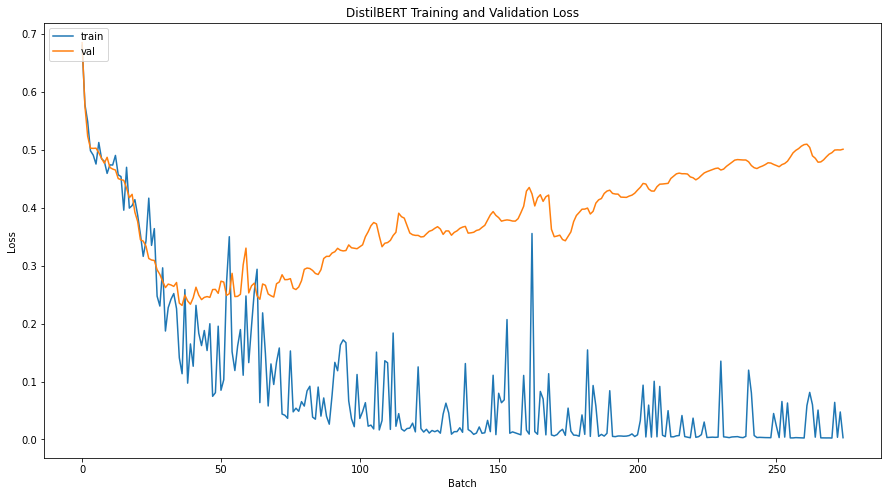

In [51]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('DistilBERT Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Batch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Model Evaluation metrics 

In [52]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [53]:
def eval_metrics(predy, df_labels, cats):
  pred = np.array(predy)
  #.squeeze(1)
  for i in range(len(pred)):
    for j in range(5):
      pred[i, j] =1 if pred[i, j] >= 0.5 else 0
  pred = pred.astype('int')

  labels = df_labels.values.tolist()
  labels = np.array(labels)
  labels = labels.astype('int')

  precision = [precision_score(labels[:, 0], pred[:, 0]),
             precision_score(labels[:, 1], pred[:, 1]),
             precision_score(labels[:, 2], pred[:, 2]),
             precision_score(labels[:, 3], pred[:, 3]),
             precision_score(labels[:, 4], pred[:, 4]),
             precision_score(labels, pred, average='macro'),
             precision_score(labels, pred, average='micro'),
             precision_score(labels, pred, average='weighted')]

  recall = [recall_score(labels[:, 0], pred[:, 0]),
          recall_score(labels[:, 1], pred[:, 1]),
          recall_score(labels[:, 2], pred[:, 2]),
          recall_score(labels[:, 3], pred[:, 3]),
          recall_score(labels[:, 4], pred[:, 4]),
          recall_score(labels, pred, average='macro'),
          recall_score(labels, pred, average='micro'),
          recall_score(labels, pred, average='weighted')]

  f1 = [f1_score(labels[:, 0], pred[:, 0]),
      f1_score(labels[:, 1], pred[:, 1]),
      f1_score(labels[:, 2], pred[:, 2]),
      f1_score(labels[:, 3], pred[:, 3]),
      f1_score(labels[:, 4], pred[:, 4]),
      f1_score(labels, pred, average='macro'),
      f1_score(labels, pred, average='micro'),
      f1_score(labels, pred, average='weighted')]
  
  metric = pd.DataFrame([precision, recall, f1], columns = cats + ['macro', 'micro', 'weighted'], index=['precision', 'recall','f1'])
  return metric

In [54]:
pred_y, val_loss_int = predict_batch(model, test_data,
                                               tokenizer, MAX_LEN=MAX_LEN, batch_size=128, 
                                               device=device, padding = True, quantize = False)

1it [00:01,  1.87s/it]

Validation Loss:  0.500435471534729


In [55]:
data.mutation_consequence.unique()

array(['HI', 'DN', 'none', 'GOF', 'LOF'], dtype=object)

In [56]:
eval_metrics(pred_y, test_data.labels, categories)

,HI,DN,none,GOF,LOF,macro,micro,weighted
precision,0.642857,0.733333,0.692308,0.75,0.722222,0.708144,0.708333,0.706544
recall,0.562500,0.733333,0.750000,0.75,0.764706,0.712108,0.708333,0.708333
f1,0.600000,0.733333,0.720000,0.75,0.742857,0.709238,0.708333,0.706508


### Model performance at initial epochs

In [59]:
# Training Performance
predictor = torch.load('models/distilbert_v2_epoch5.bin', map_location=torch.device(device))

pred_y, val_loss_int = predict_batch(predictor, train_data,
                                              tokenizer, MAX_LEN=MAX_LEN, batch_size=128, 
                                              device=device, padding = True, quantize = False)

print(eval_metrics(pred_y, train_data.labels, categories).to_markdown())

4it [00:10,  2.60s/it]

Validation Loss:  0.10069560818374157
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.862069 | 0.885057 | 1        | 0.935484 | 0.985294 | 0.933581 | 0.928571 |   0.931581 |
| recall    | 0.903614 | 0.905882 | 0.986111 | 1        | 0.807229 | 0.920567 | 0.919512 |   0.919512 |
| f1        | 0.882353 | 0.895349 | 0.993007 | 0.966667 | 0.887417 | 0.924959 | 0.92402  |   0.923395 |


In [60]:
for epoch in range(1, 24):
  print("\n\nEpoch: ", epoch)
  predictor = torch.load('models/distilbert_v2_epoch{}.bin'.format(epoch), map_location=torch.device(device))

  pred_y, val_loss_int = predict_batch(predictor, test_data,
                                                tokenizer, MAX_LEN=MAX_LEN, batch_size=128, 
                                                device=device, padding = True, quantize = False)

  print(eval_metrics(pred_y, test_data.labels, categories).to_markdown())



Epoch:  1


1it [00:01,  1.84s/it]


Validation Loss:  0.34249964356422424
|           |   HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|-----:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision |    0 | 0.833333 | 0.636364 | 1        | 0.866667 | 0.667273 | 0.826923 |   0.650968 |
| recall    |    0 | 1        | 0.583333 | 0.666667 | 0.764706 | 0.602941 | 0.597222 |   0.597222 |
| f1        |    0 | 0.909091 | 0.608696 | 0.8      | 0.8125   | 0.626057 | 0.693548 |   0.616017 |


Epoch:  2


1it [00:01,  1.85s/it]


Validation Loss:  0.2643442749977112
|           |       HI |       DN |   none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|-------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.642857 | 0.777778 |   0.75 | 0.833333 | 0.866667 | 0.774127 | 0.776119 |   0.773413 |
| recall    | 0.5625   | 0.933333 |   0.5  | 0.833333 | 0.764706 | 0.718775 | 0.722222 |   0.722222 |
| f1        | 0.6      | 0.848485 |   0.6  | 0.833333 | 0.8125   | 0.738864 | 0.748201 |   0.74083  |


Epoch:  3


1it [00:01,  1.86s/it]


Validation Loss:  0.24534887075424194
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.733333 | 0.75     | 0.777778 | 0.833333 | 0.8125   | 0.781389 | 0.779412 |   0.779572 |
| recall    | 0.6875   | 0.8      | 0.583333 | 0.833333 | 0.764706 | 0.733775 | 0.736111 |   0.736111 |
| f1        | 0.709677 | 0.774194 | 0.666667 | 0.833333 | 0.787879 | 0.75435  | 0.757143 |   0.755023 |


Epoch:  4


1it [00:01,  1.90s/it]


Validation Loss:  0.24675989151000977
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.714286 | 0.833333 | 0.8      | 0.818182 | 0.8125   | 0.79566  | 0.793651 |   0.793879 |
| recall    | 0.625    | 0.666667 | 0.666667 | 0.75     | 0.764706 | 0.694608 | 0.694444 |   0.694444 |
| f1        | 0.666667 | 0.740741 | 0.727273 | 0.782609 | 0.787879 | 0.741034 | 0.740741 |   0.740143 |


Epoch:  5


1it [00:01,  1.83s/it]


Validation Loss:  0.26625755429267883
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.666667 | 0.75     | 0.8      | 0.714286 | 0.923077 | 0.770806 | 0.760563 |   0.774728 |
| recall    | 0.75     | 0.8      | 0.666667 | 0.833333 | 0.705882 | 0.751176 | 0.75     |   0.75     |
| f1        | 0.705882 | 0.774194 | 0.727273 | 0.769231 | 0.8      | 0.755316 | 0.755245 |   0.756459 |


Epoch:  6


1it [00:01,  1.88s/it]


Validation Loss:  0.2588992714881897
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.833333 | 0.733333 | 0.818182 | 0.818182 | 0.777778 | 0.796162 | 0.791045 |   0.794332 |
| recall    | 0.625    | 0.733333 | 0.75     | 0.75     | 0.823529 | 0.736373 | 0.736111 |   0.736111 |
| f1        | 0.714286 | 0.733333 | 0.782609 | 0.782609 | 0.8      | 0.762567 | 0.76259  |   0.761266 |


Epoch:  7


1it [00:01,  1.89s/it]


Validation Loss:  0.31622591614723206
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.75     | 0.75     | 0.692308 | 0.769231 | 0.75     | 0.742308 | 0.742857 |   0.74359  |
| recall    | 0.5625   | 0.8      | 0.75     | 0.833333 | 0.705882 | 0.730343 | 0.722222 |   0.722222 |
| f1        | 0.642857 | 0.774194 | 0.72     | 0.8      | 0.727273 | 0.732865 | 0.732394 |   0.729198 |


Epoch:  8


1it [00:01,  1.88s/it]


Validation Loss:  0.3293706476688385
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.769231 | 0.714286 | 0.727273 | 0.769231 | 0.722222 | 0.740448 | 0.73913  |   0.739692 |
| recall    | 0.625    | 0.666667 | 0.666667 | 0.833333 | 0.764706 | 0.711275 | 0.708333 |   0.708333 |
| f1        | 0.689655 | 0.689655 | 0.695652 | 0.8      | 0.742857 | 0.723564 | 0.723404 |   0.721607 |


Epoch:  9


1it [00:01,  1.88s/it]


Validation Loss:  0.33997586369514465
|           |       HI |       DN |   none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|-------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.692308 | 0.764706 |   0.75 | 0.818182 | 0.705882 | 0.746216 | 0.742857 |   0.74119  |
| recall    | 0.5625   | 0.866667 |   0.75 | 0.75     | 0.705882 | 0.72701  | 0.722222 |   0.722222 |
| f1        | 0.62069  | 0.8125   |   0.75 | 0.782609 | 0.705882 | 0.734336 | 0.732394 |   0.729303 |


Epoch:  10


1it [00:01,  1.88s/it]


Validation Loss:  0.3523862361907959
|           |     HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|-------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.5625 | 0.733333 | 0.777778 | 0.769231 | 0.684211 | 0.70541  | 0.694444 |   0.697162 |
| recall    | 0.5625 | 0.733333 | 0.583333 | 0.833333 | 0.764706 | 0.695441 | 0.694444 |   0.694444 |
| f1        | 0.5625 | 0.733333 | 0.666667 | 0.8      | 0.722222 | 0.696944 | 0.694444 |   0.692747 |


Epoch:  11


1it [00:01,  1.88s/it]


Validation Loss:  0.36006441712379456
|           |       HI |       DN |     none |   GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|------:|---------:|---------:|---------:|-----------:|
| precision | 0.578947 | 0.75     | 0.8      |  0.75 | 0.75     | 0.725789 | 0.710145 |   0.720322 |
| recall    | 0.6875   | 0.8      | 0.666667 |  0.75 | 0.529412 | 0.686716 | 0.680556 |   0.680556 |
| f1        | 0.628571 | 0.774194 | 0.727273 |  0.75 | 0.62069  | 0.700145 | 0.695035 |   0.693737 |


Epoch:  12


1it [00:01,  1.90s/it]


Validation Loss:  0.36220407485961914
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.666667 | 0.733333 | 0.8      | 0.769231 | 0.764706 | 0.746787 | 0.742857 |   0.74302  |
| recall    | 0.625    | 0.733333 | 0.666667 | 0.833333 | 0.764706 | 0.724608 | 0.722222 |   0.722222 |
| f1        | 0.645161 | 0.733333 | 0.727273 | 0.8      | 0.764706 | 0.734095 | 0.732394 |   0.731248 |


Epoch:  13


1it [00:01,  1.88s/it]


Validation Loss:  0.37847408652305603
|           |       HI |       DN |   none |   GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|-------:|------:|---------:|---------:|---------:|-----------:|
| precision | 0.769231 | 0.714286 |   0.75 |  0.75 | 0.722222 | 0.741148 | 0.73913  |   0.740274 |
| recall    | 0.625    | 0.666667 |   0.75 |  0.75 | 0.764706 | 0.711275 | 0.708333 |   0.708333 |
| f1        | 0.689655 | 0.689655 |   0.75 |  0.75 | 0.742857 | 0.724433 | 0.723404 |   0.722332 |


Epoch:  14


1it [00:01,  1.89s/it]


Validation Loss:  0.42263561487197876
|           |       HI |       DN |     none |   GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|------:|---------:|---------:|---------:|-----------:|
| precision | 0.642857 | 0.714286 | 0.727273 |  0.75 | 0.684211 | 0.703725 | 0.7      |   0.699428 |
| recall    | 0.5625   | 0.666667 | 0.666667 |  0.75 | 0.764706 | 0.682108 | 0.680556 |   0.680556 |
| f1        | 0.6      | 0.689655 | 0.695652 |  0.75 | 0.722222 | 0.691506 | 0.690141 |   0.688478 |


Epoch:  15


1it [00:01,  1.92s/it]


Validation Loss:  0.3584064245223999
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.769231 | 0.75     | 0.785714 | 0.769231 | 0.785714 | 0.771978 | 0.771429 |   0.771864 |
| recall    | 0.625    | 0.8      | 0.916667 | 0.833333 | 0.647059 | 0.764412 | 0.75     |   0.75     |
| f1        | 0.689655 | 0.774194 | 0.846154 | 0.8      | 0.709677 | 0.763936 | 0.760563 |   0.756469 |


Epoch:  16


1it [00:01,  1.86s/it]


Validation Loss:  0.41608157753944397
|           |       HI |       DN |     none |   GOF |      LOF |    macro |   micro |   weighted |
|:----------|---------:|---------:|---------:|------:|---------:|---------:|--------:|-----------:|
| precision | 0.818182 | 0.75     | 0.733333 |  0.75 | 0.722222 | 0.754747 |    0.75 |   0.755815 |
| recall    | 0.5625   | 0.8      | 0.916667 |  0.75 | 0.764706 | 0.758775 |    0.75 |   0.75     |
| f1        | 0.666667 | 0.774194 | 0.814815 |  0.75 | 0.742857 | 0.749706 |    0.75 |   0.745638 |


Epoch:  17


1it [00:01,  1.87s/it]


Validation Loss:  0.42189115285873413
|           |       HI |       DN |     none |   GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|------:|---------:|---------:|---------:|-----------:|
| precision | 0.642857 | 0.733333 | 0.769231 |  0.75 | 0.722222 | 0.723529 | 0.722222 |   0.719365 |
| recall    | 0.5625   | 0.733333 | 0.833333 |  0.75 | 0.764706 | 0.728775 | 0.722222 |   0.722222 |
| f1        | 0.6      | 0.733333 | 0.8      |  0.75 | 0.742857 | 0.725238 | 0.722222 |   0.719841 |


Epoch:  18


1it [00:01,  1.88s/it]


Validation Loss:  0.44109776616096497
|           |       HI |       DN |     none |      GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|-----------:|
| precision | 0.833333 | 0.75     | 0.733333 | 0.769231 | 0.733333 | 0.763846 | 0.760563 |   0.765011 |
| recall    | 0.625    | 0.8      | 0.916667 | 0.833333 | 0.647059 | 0.764412 | 0.75     |   0.75     |
| f1        | 0.714286 | 0.774194 | 0.814815 | 0.8      | 0.6875   | 0.758159 | 0.755245 |   0.751483 |


Epoch:  19


1it [00:01,  1.87s/it]


Validation Loss:  0.45189765095710754
|           |       HI |       DN |     none |   GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|------:|---------:|---------:|---------:|-----------:|
| precision | 0.692308 | 0.75     | 0.769231 |  0.75 | 0.722222 | 0.736752 | 0.736111 |   0.733826 |
| recall    | 0.5625   | 0.8      | 0.833333 |  0.75 | 0.764706 | 0.742108 | 0.736111 |   0.736111 |
| f1        | 0.62069  | 0.774194 | 0.8      |  0.75 | 0.742857 | 0.737548 | 0.736111 |   0.732952 |


Epoch:  20


1it [00:01,  1.88s/it]


Validation Loss:  0.4668518304824829
|           |       HI |       DN |     none |   GOF |      LOF |    macro |   micro |   weighted |
|:----------|---------:|---------:|---------:|------:|---------:|---------:|--------:|-----------:|
| precision | 0.818182 | 0.75     | 0.733333 |  0.75 | 0.722222 | 0.754747 |    0.75 |   0.755815 |
| recall    | 0.5625   | 0.8      | 0.916667 |  0.75 | 0.764706 | 0.758775 |    0.75 |   0.75     |
| f1        | 0.666667 | 0.774194 | 0.814815 |  0.75 | 0.742857 | 0.749706 |    0.75 |   0.745638 |


Epoch:  21


1it [00:01,  1.88s/it]


Validation Loss:  0.4692312180995941
|           |       HI |       DN |   none |   GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|-------:|------:|---------:|---------:|---------:|-----------:|
| precision | 0.642857 | 0.733333 |   0.75 |  0.75 | 0.705882 | 0.716415 | 0.714286 |   0.712302 |
| recall    | 0.5625   | 0.733333 |   0.75 |  0.75 | 0.705882 | 0.700343 | 0.694444 |   0.694444 |
| f1        | 0.6      | 0.733333 |   0.75 |  0.75 | 0.705882 | 0.707843 | 0.704225 |   0.702778 |


Epoch:  22


1it [00:01,  1.96s/it]


Validation Loss:  0.47653549909591675
|           |       HI |       DN |     none |   GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|------:|---------:|---------:|---------:|-----------:|
| precision | 0.8      | 0.75     | 0.733333 |  0.75 | 0.722222 | 0.751111 | 0.746479 |   0.751775 |
| recall    | 0.5      | 0.8      | 0.916667 |  0.75 | 0.764706 | 0.746275 | 0.736111 |   0.736111 |
| f1        | 0.615385 | 0.774194 | 0.814815 |  0.75 | 0.742857 | 0.73945  | 0.741259 |   0.734242 |


Epoch:  23


1it [00:01,  1.88s/it]

Validation Loss:  0.4856047034263611
|           |       HI |       DN |     none |   GOF |      LOF |    macro |    micro |   weighted |
|:----------|---------:|---------:|---------:|------:|---------:|---------:|---------:|-----------:|
| precision | 0.642857 | 0.733333 | 0.714286 |  0.75 | 0.722222 | 0.71254  | 0.712329 |   0.710207 |
| recall    | 0.5625   | 0.733333 | 0.833333 |  0.75 | 0.764706 | 0.728775 | 0.722222 |   0.722222 |
| f1        | 0.6      | 0.733333 | 0.769231 |  0.75 | 0.742857 | 0.719084 | 0.717241 |   0.714713 |



0it [00:00, ?it/s]
1it [00:02,  2.45s/it]

Validation Loss:  0.42725130915641785


,HI,DN,none,GOF,LOF,macro,micro,weighted
precision,1.00000,0.750000,0.857143,0.500000,0.533333,0.728095,0.675676,0.730589
recall,0.31250,0.200000,0.500000,0.250000,0.470588,0.346618,0.347222,0.347222
f1,0.47619,0.315789,0.631579,0.333333,0.500000,0.451378,0.458716,0.450484
